<h1 align=center><font size = 6>The Battle of Neighborhood for Best Restaurant</font></h1>

<h3 align=left><font size =4>1. Description of the problem</fornt></h3>

The idea of this study is to help people planning to open a new coffee shop or Resturant in Tokyo to choose the right location by providing data about the income and population of each neighborhood as well as the competitors already present on the same regions.
The Tokyo is the most populous metropolitan area in Japan. It consists 23 wards of Tokyo.It is The capital of Japan it houses the Emperor of Japan and the Japanese government. Tokyo forms part of the Kantō region on the southeastern side of Japan's main island, Honshu, and includes the Izu and Ogasawara Islands. In Tokyo there are many neighborhood that have many coffee shop and restaurant so choosing a place were there can be more profits is very important.

<font color=Red>Target Audience</font>

1.Business personnel who wants to invest or open a restaurant. This analysis will be a comprehensive guide to 
start or expand restaurants targeting the large pool of office workers in Tokyo during lunch hours.

2.New graduates, to find reasonable lunch/breakfast place close to office.

3.Budding Data Scientists, who wants to implement some of the most used Exploratory DataAnalysis techniques to obtain necessary data, analyze it and, finally be able to tell a story out of it.

<h3 align=left><font size =4>2. Initial Data Preparation</fornt></h3>

<h3 align=left><font size =3>Clean up and prepare the data (Week 1)</fornt></h3>

In order to make the process easy I have used the This is a list 23 wards in Tokyo city from  wikipedia and cleaning the data to optain the data in tabular format also it is important to optain the list of major Districts Population for the wikipedia page.

In [1]:
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo').text
print (type (response_obj))

<class 'str'>


In [3]:
soup = BeautifulSoup(response_obj,'lxml')
print (soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Special wards of Tokyo - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XmK0cQpAMNIAA3Y14bsAAACF","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Special_wards_of_Tokyo","wgTitle":"Special wards of Tokyo","wgCurRevisionId":937905104,"wgRevisionId":937905104,"wgArticleId":296875,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","

In [4]:
Wards_Tokyo_Table = soup.find('table', {'class':'wikitable sortable'})
Wards_Tokyo_Table

<table class="wikitable sortable">
<tbody><tr>
<th>No.
</th>
<th class="unsortable">Flag
</th>
<th>Name
</th>
<th class="unsortable" width="55px">Kanji
</th>
<th>Population<br/>(as of October 2016<sup class="plainlinks noexcerpt noprint asof-tag update" style="display:none;"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Special_wards_of_Tokyo&amp;action=edit">[update]</a></sup>)
</th>
<th>Density<br/><span style="font-size:90%;">(/km<sup>2</sup>)</span>
</th>
<th>Area<br/><span style="font-size:90%;">(km<sup>2</sup>)</span>
</th>
<th class="unsortable">Major districts
</th></tr>
<tr>
<td>01</td>
<td><a class="image" href="/wiki/File:Flag_of_Chiyoda,_Tokyo.svg"><img alt="Flag of Chiyoda, Tokyo.svg" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="33" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/50px-Flag_of_Chiyoda%2C_Tokyo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commo

In [5]:
Name=[]
Kanji = []
Pop = []
Density = []
num = []
flag = []
Area = []
Major_District = []

for row in Wards_Tokyo_Table.findAll("tr"):
    #print (row)    
    Ward = row.findAll('td')
    #print (len(Ward))
    print (Ward)
    if len(Ward)==8: #Only extract table body not heading
        print (Ward[0])
        #print postcode[1]
        #print postcode[2]
        num.append(Ward[0].find(text=True))
        flag.append(Ward[1].findAll('a')) # useless
        Name.append(Ward[2])
        Kanji.append(Ward[3].find(text=True))
        Pop.append(Ward[4])
        Area.append(Ward[5].find(text=True))
        Major_District.append(Ward[7].find(text=True))
            
Area = ['5100' if x=='0' else x for x in Area]
New_Area = []

# change the type of Area list 
for l in range(len(Area)):
    x=Area[l].replace(",","")
    print (x)
    New_Area.append(x)

New_Area=[int(s) for s in New_Area]

new_names = []
for n in range(len(Name)):
    print (Name[n])
    names = Name[n].findAll('a')
    new_names.append(names) 

print (new_names)

flat_new_names_list = [item for sublist in new_names for item in sublist]
print (flat_new_names_list)

Wards_names= []
#now 
for name_wards in flat_new_names_list:
        Wards_names.append(name_wards.get('title'))

print (Wards_names)

# replace the elements in the list that contains 'Tokyo' with only the ward names
replace_names={'Chiyoda, Tokyo':'Chiyoda', 'Chūō, Tokyo':'Chuo', 'Minato, Tokyo':'Minato', 
               'Sumida, Tokyo':'Sumida', 'Koto, Tokyo':'Koto', 'Ōta, Tokyo':'Ota', 'Nakano, Tokyo':'Nakano', 
               'Kita, Tokyo':'Kita', 'Arakawa, Tokyo':'Arakawa', 'Adachi, Tokyo':'Adachi', 'Edogawa, Tokyo':'Edogawa'}


Wards_names1 = [replace_names.get(n1,n1) for n1 in Wards_names]

population = []
for p in range(len(Pop)):
    print ((Pop[p]))
    pops = Pop[p].text[1:9]
    print (Pop[p].text[1:9])
    
    population.append(pops) 
print (population)


New_population = []
for po in range(len(population)):
    xy=population[po].replace(",","")
    print (xy)
    New_population.append(xy)

New_population=[int(s1) for s1 in New_population]

replace_districts = {'Nagatachō':'Nagatacho', 'Hongō':'Hongo', 'Kinshichō':'Kinshicho', 'Ōmori': 'Omori', 
                     'Kōenji':'Koenji', 'Arakawa, Machiya, ':'Arakawa', 'Ayase, ':'Ayase', 'Kasai, Koiwa\n':'Kasai'}


Major_District_names1 = [replace_districts.get(n2,n2) for n2 in Major_District]
#print (Major_District_names1)

df=pd.DataFrame(Wards_names1,columns=['Ward'])
df['Area_SqKm'] = New_Area
df['Population'] = New_population
df['Major_District'] = Major_District_names1
df.index = np.arange(1, len(df) + 1) # reset the index so that it starts from 1. 

# use of geopy geocoders
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Tokyo_explorer")
df['Major_Dist_Coord']= df['Major_District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
# replace some of the wrong coordinates 


Lat_list = df['Latitude'].tolist()
Long_list = df['Longitude'].tolist()
print ("Old latitude list: ", Lat_list)
print ("Old Longitude list: ", Long_list)
replace_latitudes = {32.5093796:35.7088, 23.0131338:35.6722, -38.9047057:35.5884, -5.3498001:35.6634}
replace_longitudes = {-116.2970014:139.7601, -80.8328748:139.8061, 175.7552111:139.7279, 21.424098:139.8731}

latitudes_new = [replace_latitudes.get(n3,n3) for n3 in Lat_list]
longtitudes_new = [replace_longitudes.get(n4,n4) for n4 in Long_list]
print (latitudes_new)
print (longtitudes_new)

Tokyo_df = df.drop(['Latitude', 'Longitude'], axis=1)
# #df.drop(['Longitude'], axis=1, inplace=True)
# Tokyo_df


Tokyo_df['Dist_Latitude'] = latitudes_new
Tokyo_df['Dist_Longitude'] = longtitudes_new

Tokyo_df

Tokyo_df.to_csv('Tokyo_df_Coord.csv')

[]
[<td>01</td>, <td><a class="image" href="/wiki/File:Flag_of_Chiyoda,_Tokyo.svg"><img alt="Flag of Chiyoda, Tokyo.svg" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="33" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/50px-Flag_of_Chiyoda%2C_Tokyo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/75px-Flag_of_Chiyoda%2C_Tokyo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/100px-Flag_of_Chiyoda%2C_Tokyo.svg.png 2x" width="50"/></a></td>, <td><a href="/wiki/Chiyoda,_Tokyo" title="Chiyoda, Tokyo">Chiyoda</a></td>, <td>千代田区
</td>, <td><span style="visibility:hidden;color:transparent;">0</span><span style="visibility:hidden;color:transparent;">0</span>59,441</td>, <td><span style="visibility:hidden;color:transparent;">0</span>5,100</td>, <td><span style="visibility:hidden;color:transparent;">0</span>11.66
</td>, <t

</td>]
<td>21</td>
[<td>22</td>, <td><a class="image" href="/wiki/File:Flag_of_Katsushika-ku,_Tokyo.svg"><img alt="Flag of Katsushika-ku, Tokyo.svg" class="thumbborder" data-file-height="216" data-file-width="324" decoding="async" height="33" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/43/Flag_of_Katsushika-ku%2C_Tokyo.svg/50px-Flag_of_Katsushika-ku%2C_Tokyo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/43/Flag_of_Katsushika-ku%2C_Tokyo.svg/75px-Flag_of_Katsushika-ku%2C_Tokyo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/43/Flag_of_Katsushika-ku%2C_Tokyo.svg/100px-Flag_of_Katsushika-ku%2C_Tokyo.svg.png 2x" width="50"/></a></td>, <td><a href="/wiki/Katsushika" title="Katsushika">Katsushika</a></td>, <td>葛飾区
</td>, <td><span style="visibility:hidden;color:transparent;">0</span>447,140</td>, <td>12,850</td>, <td><span style="visibility:hidden;color:transparent;">0</span>34.80
</td>, <td><a class="mw-redirect" href="/wiki/Tateishi" title="Tate

Old latitude list:  [35.675618, 35.684058, 35.619050200000004, 35.6937632, 35.1753761, 35.7117587, 35.6963122, 23.0131338, 35.599252, 35.62125, 35.5884735, 35.646096, 35.6645956, 35.718123, 35.7049419, 35.729798599999995, 35.7781394, 35.737529, 35.774143, 35.74836, 35.4460475, 33.4817913, -5.3498001]
Old Longitude list:  [139.7434685, 139.77450137797854, 139.77936404588297, 139.7036319, 137.0134764, 139.7776445, 139.8150431, -80.8328748, 139.73891, 139.688014, 139.7279334, 139.65627, 139.6987107, 139.664468, 139.649909, 139.71024215303126, 139.7207999, 139.78131, 139.681209, 139.638735, 139.430823, 131.4781536, 21.424098]
[35.675618, 35.684058, 35.619050200000004, 35.6937632, 35.1753761, 35.7117587, 35.6963122, 35.6722, 35.599252, 35.62125, 35.5884735, 35.646096, 35.6645956, 35.718123, 35.7049419, 35.729798599999995, 35.7781394, 35.737529, 35.774143, 35.74836, 35.4460475, 33.4817913, 35.6634]
[139.7434685, 139.77450137797854, 139.77936404588297, 139.7036319, 137.0134764, 139.7776445, 1

In [6]:
df=pd.DataFrame(Wards_names1,columns=['Ward'])
df['Area_SqKm'] = New_Area
df['Population'] = New_population
df['Major_District'] = Major_District_names1
df.index = np.arange(1, len(df) + 1) # reset the index so that it starts from 1. 
#print (df)
df

,Ward,Area_SqKm,Population,Major_District
1,Chiyoda,5100,59441,Nagatacho
2,Chuo,14460,147620,Nihonbashi
3,Minato,12180,248071,Odaiba
4,Shinjuku,18620,339211,Shinjuku
5,Bunkyō,19790,223389,Hongo
6,Taitō,19830,200486,Ueno
7,Sumida,18910,260358,Kinshicho
8,Koto,12510,502579,Kiba
9,Shinagawa,17180,392492,Shinagawa
10,Meguro,19110,280283,Meguro


In [7]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
df['Major_Dist_Coord']= df['Major_District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

df

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


,Ward,Area_SqKm,Population,Major_District,Major_Dist_Coord
1,Chiyoda,5100,59441,Nagatacho,"(35.675618, 139.7434685)"
2,Chuo,14460,147620,Nihonbashi,"(35.684058, 139.77450137797854)"
3,Minato,12180,248071,Odaiba,"(35.619050200000004, 139.77936404588297)"
4,Shinjuku,18620,339211,Shinjuku,"(35.6937632, 139.7036319)"
5,Bunkyō,19790,223389,Hongo,"(35.1753761, 137.0134764)"
6,Taitō,19830,200486,Ueno,"(35.7117587, 139.7776445)"
7,Sumida,18910,260358,Kinshicho,"(35.6963122, 139.8150431)"
8,Koto,12510,502579,Kiba,"(23.0131338, -80.8328748)"
9,Shinagawa,17180,392492,Shinagawa,"(35.599252, 139.73891)"
10,Meguro,19110,280283,Meguro,"(35.62125, 139.688014)"


In [8]:
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)
df

,Ward,Area_SqKm,Population,Major_District,Major_Dist_Coord,Latitude,Longitude
1,Chiyoda,5100,59441,Nagatacho,"(35.675618, 139.7434685)",35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,"(35.684058, 139.77450137797854)",35.684058,139.774501
3,Minato,12180,248071,Odaiba,"(35.619050200000004, 139.77936404588297)",35.619050,139.779364
4,Shinjuku,18620,339211,Shinjuku,"(35.6937632, 139.7036319)",35.693763,139.703632
5,Bunkyō,19790,223389,Hongo,"(35.1753761, 137.0134764)",35.175376,137.013476
6,Taitō,19830,200486,Ueno,"(35.7117587, 139.7776445)",35.711759,139.777645
7,Sumida,18910,260358,Kinshicho,"(35.6963122, 139.8150431)",35.696312,139.815043
8,Koto,12510,502579,Kiba,"(23.0131338, -80.8328748)",23.013134,-80.832875
9,Shinagawa,17180,392492,Shinagawa,"(35.599252, 139.73891)",35.599252,139.738910
10,Meguro,19110,280283,Meguro,"(35.62125, 139.688014)",35.621250,139.688014


In [9]:
df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,Ward,Area_SqKm,Population,Major_District,Latitude,Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501
3,Minato,12180,248071,Odaiba,35.619050,139.779364
4,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632
5,Bunkyō,19790,223389,Hongo,35.175376,137.013476
6,Taitō,19830,200486,Ueno,35.711759,139.777645
7,Sumida,18910,260358,Kinshicho,35.696312,139.815043
8,Koto,12510,502579,Kiba,23.013134,-80.832875
9,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910
10,Meguro,19110,280283,Meguro,35.621250,139.688014


In [10]:
#df.dtypes
Lat_list = df['Latitude'].tolist()
Long_list = df['Longitude'].tolist()
print ("Old latitude list: ", Lat_list)
print ("Old Longitude list: ", Long_list)
replace_latitudes = {32.5093796:35.7088, 23.0131338:35.6722, -38.9047057:35.5884, -5.3498001:35.6634}
replace_longitudes = {-116.2970014:139.7601, -80.8328748:139.8061, 175.7552111:139.7279, 21.424098:139.8731}

latitudes_new = [replace_latitudes.get(n3,n3) for n3 in Lat_list]
longtitudes_new = [replace_longitudes.get(n4,n4) for n4 in Long_list]
print (latitudes_new)
print (longtitudes_new)

Tokyo_df = df.drop(['Latitude', 'Longitude'], axis=1)


Old latitude list:  [35.675618, 35.684058, 35.619050200000004, 35.6937632, 35.1753761, 35.7117587, 35.6963122, 23.0131338, 35.599252, 35.62125, 35.5884735, 35.646096, 35.6645956, 35.718123, 35.7049419, 35.729798599999995, 35.7781394, 35.737529, 35.774143, 35.74836, 35.4460475, 33.4817913, -5.3498001]
Old Longitude list:  [139.7434685, 139.77450137797854, 139.77936404588297, 139.7036319, 137.0134764, 139.7776445, 139.8150431, -80.8328748, 139.73891, 139.688014, 139.7279334, 139.65627, 139.6987107, 139.664468, 139.649909, 139.71024215303126, 139.7207999, 139.78131, 139.681209, 139.638735, 139.430823, 131.4781536, 21.424098]
[35.675618, 35.684058, 35.619050200000004, 35.6937632, 35.1753761, 35.7117587, 35.6963122, 35.6722, 35.599252, 35.62125, 35.5884735, 35.646096, 35.6645956, 35.718123, 35.7049419, 35.729798599999995, 35.7781394, 35.737529, 35.774143, 35.74836, 35.4460475, 33.4817913, 35.6634]
[139.7434685, 139.77450137797854, 139.77936404588297, 139.7036319, 137.0134764, 139.7776445, 1

In [11]:
Tokyo_df['Dist_Latitude'] = latitudes_new
Tokyo_df['Dist_Longitude'] = longtitudes_new

Tokyo_df

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501
3,Minato,12180,248071,Odaiba,35.619050,139.779364
4,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632
5,Bunkyō,19790,223389,Hongo,35.175376,137.013476
6,Taitō,19830,200486,Ueno,35.711759,139.777645
7,Sumida,18910,260358,Kinshicho,35.696312,139.815043
8,Koto,12510,502579,Kiba,35.672200,139.806100
9,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910
10,Meguro,19110,280283,Meguro,35.621250,139.688014


<h3 align=left><font size =4>2.2 Conclusion</fornt></h3>

<h3 align=left><font size =3>Description of Problem and Data Preparation(Week 1)</fornt></h3>
We get the Initial Data-Frame with Names of Major Wards, and corresponding districts in those Major Wards 
and the coordinates of those major districts. Before comparing all the wards, since we want to concentrate only on lunch restaurants targeting the office workers, we need to get the idea about the best business areas in Tokyo. Here we want to concentrate on the best five wards

Chiyoda. Major District: Nagatacho
Shinjuku. Major District: Shinjuku
Shibuya. Major District: Shibuya
Chuo. Major District: Nihombashi
Shinagawa. Major District: Shinagawa

So as the next step we will use Foursquare data and obtain information on restaurants. With these, we can start with our battle of neighborhoods for opening a restaurant in Tokyo.

<h3 align=left><font size =4>3 Exploratory Data Analysis(Week 2)</fornt></h3>

In [12]:
Tokyo_df = pd.read_csv('Tokyo_df_Coord.csv', index_col=[0])
#remove the unnamed column 
Tokyo_df.head(3)

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501
3,Minato,12180,248071,Odaiba,35.619050,139.779364


In [13]:
response_obj = requests.get('https://utinokati.com/en/details/land-market-value/area/Tokyo/').text
print (type (response_obj))
soup = BeautifulSoup(response_obj,'lxml')
print (soup.prettify())

<class 'str'>
<!DOCTYPE html>
<html content="en" id="utinokati">
 <head>
  <meta charset="utf-8"/>
  <meta content="en" http-equiv="content-language"/>
  <link href="https://utinokati.com/en/details/land-market-value/area/Tokyo/" rel="canonical"/>
  <meta content="Tokyo,land market value,real estate market value" name="keywords"/>
  <meta content=" The Tokyo Land market price is 475,727 JPY/sq.m. You can easily calculate the assumed price from the station distance, area etc." name="description"/>
  <meta content="ウチノカチ" name="author"/>
  <title>
   Tokyo Land market value
  </title>
  <meta content="Tokyo Land market value" property="og:title"/>
  <meta content=" The Tokyo Land market price is 475,727 JPY/sq.m. You can easily calculate the assumed price from the station distance, area etc." property="og:description"/>
  <meta content="https://utinokati.com/image/ogpimage.jpg" property="og:image"/>
  <meta content="https://utinokati.com/en/details/land-market-value/area/Tokyo/" property

In [14]:
Price_Tokyo_Table = soup.find('table', {'class':'table-condensed'})

In [15]:
Name=[]
Avg_price = []


for row in Price_Tokyo_Table.findAll("tr"):
    #print (row)    
    price = row.findAll('td')
#    print (price)
#     print (Ward)
    if len(price)==3: 
         Name.append(price[0].find(text=True))
         Avg_price.append(price[2].find(text=True))   

price_df = pd.DataFrame(Name,columns=['Ward'])
price_df['Avg_price_sqKm'] = Avg_price

#price_df



price_df['Avg_price_sqKm'] = price_df['Avg_price_sqKm'].map(lambda x: x.rstrip('JPY/sq.m').rstrip('0123456789'))

#print (price_df.dtypes)
# Change the average price column datatype 
Avg_price_list = price_df['Avg_price_sqKm'].tolist()
New_Avg_price = []

for pr in range(len(Avg_price_list)):
    x = Avg_price_list[pr].replace(",", "")
    New_Avg_price.append(x)


Avg_price_new=[int(s) for s in New_Avg_price]

price_df.drop(['Avg_price_sqKm'], axis=1, inplace=True)

price_df['Average_Price(SqKm)'] = New_Avg_price

price_df

,Ward,Average_Price(SqKm)


In [16]:
pd.options.mode.chained_assignment = None
ward_list = ['Chiyoda-Ku', 'Chuo-Ku', 'Shinjuku-Ku', 'Shibuya-Ku', 'Shinagawa-Ku']
price_df_selected = price_df.loc[price_df['Ward'].isin(ward_list)]
price_df_selected.index = np.arange(1, len(price_df_selected) + 1)
price_df_selected['Ward']=price_df_selected['Ward'].map(lambda y: str(y)[:-3]) 
price_df_selected

,Ward,Average_Price(SqKm)


In [17]:
ward_list1 = ['Chiyoda', 'Chuo', 'Shinjuku', 'Shibuya', 'Shinagawa']
Tokyo_df_selected = Tokyo_df.loc[Tokyo_df['Ward'].isin(ward_list1)]
Tokyo_df_selected

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501
4,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632
9,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910
13,Shibuya,15080,227850,Shibuya,35.664596,139.698711


In [18]:
Tokyo_df_selected_final = Tokyo_df_selected.merge(price_df_selected, on='Ward', how='left')
Tokyo_df_selected_final.index = np.arange(1, len(Tokyo_df_selected_final)+1)
Tokyo_df_selected_final.to_csv('Tokyo_5_Wards.csv')
Tokyo_df_selected_final

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm)
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469,NaN
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501,NaN
3,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632,NaN
4,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910,NaN
5,Shibuya,15080,227850,Shibuya,35.664596,139.698711,NaN


In [19]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
Tokyo_latitude = location.latitude
Tokyo_longitude = location.longitude
print('The geograpical coordinates of Tokyo are {}, {}.'.format(Tokyo_latitude, Tokyo_longitude))

The geograpical coordinates of Tokyo are 35.6828387, 139.7594549.


In [ ]:
import folium
# # create map of Most Busy Office Areas of Tokyo using latitude and longitude values
Tokyo_5Wards = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Tokyo_df_selected_final['Dist_Latitude'], Tokyo_df_selected_final['Dist_Longitude'], 
                           Tokyo_df_selected_final['Major_District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Tokyo_5Wards)  

In [21]:
CLIENT_ID = 'DWZWSYZMDKLRZRJ2NDZLGQKTKI3O0IZPAEZ5SK5UE3NLPXAO' 
CLIENT_SECRET = 'ZVTZXZRGS4RC2EGRIBBLILMEMXZRSQZNKIS0QQJO420WM0FF' 
VERSION = '20190325' # Foursquare API version

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
My CLIENT_ID: DWZWSYZMDKLRZRJ2NDZLGQKTKI3O0IZPAEZ5SK5UE3NLPXAO
My CLIENT_SECRET:ZVTZXZRGS4RC2EGRIBBLILMEMXZRSQZNKIS0QQJO420WM0FF


In [22]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [23]:
Tokyo_5_Dist_Venues = getNearbyVenues(names=Tokyo_df_selected_final['Major_District'],
                                   latitudes=Tokyo_df_selected_final['Dist_Latitude'],
                                   longitudes=Tokyo_df_selected_final['Dist_Longitude']
                                  )

Nagatacho
Nihonbashi
Shinjuku
Shinagawa
Shibuya


In [24]:
print ("Shape of the Venues Dataframe: ", Tokyo_5_Dist_Venues.shape)
Tokyo_5_Dist_Venues.tail(3)

Shape of the Venues Dataframe:  (500, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
497,Shibuya,35.664596,139.698711,pivoine,35.666129,139.692082,Women's Store
498,Shibuya,35.664596,139.698711,NUMBER SUGAR,35.666434,139.706014,Candy Store
499,Shibuya,35.664596,139.698711,Chibakara (ちばから),35.659600,139.695541,Ramen Restaurant


In [25]:
Tokyo_5_Dist_Venues_only_restaurant = Tokyo_5_Dist_Venues[Tokyo_5_Dist_Venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Tokyo_5_Dist_Venues_only_restaurant.index = np.arange(1, len(Tokyo_5_Dist_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Tokyo_5_Dist_Venues_only_restaurant.shape)
Tokyo_5_Dist_Venues_only_restaurant.head(3)

Shape of the Data-Frame with Venue Category only Restaurant:  (187, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Nagatacho,35.675618,139.743469,Nagatacho Kurosawa (永田町 黒澤),35.674699,139.741737,Japanese Restaurant
2,Nagatacho,35.675618,139.743469,Shinamen Hashigo (支那麺 はしご),35.672184,139.741576,Ramen Restaurant
3,Nagatacho,35.675618,139.743469,Sushi Isshin (鮨 一新),35.672589,139.739399,Sushi Restaurant


In [ ]:
map_restaurants = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Tokyo_5_Dist_Venues_only_restaurant['Venue_Lat'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['Venue_Long'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['Venue_Category'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
#map_restaurants

In [27]:
print('There are {} unique categories.'.format(len(Tokyo_5_Dist_Venues['Venue_Category'].unique())))
print (Tokyo_5_Dist_Venues[['Venue_Category']][70:75])

There are 134 unique categories.
         Venue_Category
70   Chinese Restaurant
71         Burger Joint
72  Szechuan Restaurant
73   Seafood Restaurant
74   Kaiseki Restaurant


In [28]:
print (Tokyo_5_Dist_Venues['Venue_Category'].value_counts())

Japanese Restaurant    31
Ramen Restaurant       25
BBQ Joint              24
Sake Bar               19
Café                   18
                       ..
Dumpling Restaurant     1
Fried Chicken Joint     1
Kebab Restaurant        1
Wagashi Place           1
Train Station           1
Name: Venue_Category, Length: 134, dtype: int64


In [29]:
Tokyo_5_Dist_Venues_Top10 = Tokyo_5_Dist_Venues['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_5_Dist_Venues_Top10=Tokyo_5_Dist_Venues_Top10.reset_index()
Tokyo_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Tokyo_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Japanese Restaurant,31
1,Ramen Restaurant,25
2,BBQ Joint,24
3,Sake Bar,19
4,Café,18
5,Bar,17
6,Chinese Restaurant,14
7,Convenience Store,14
8,Coffee Shop,14
9,Hotel,13


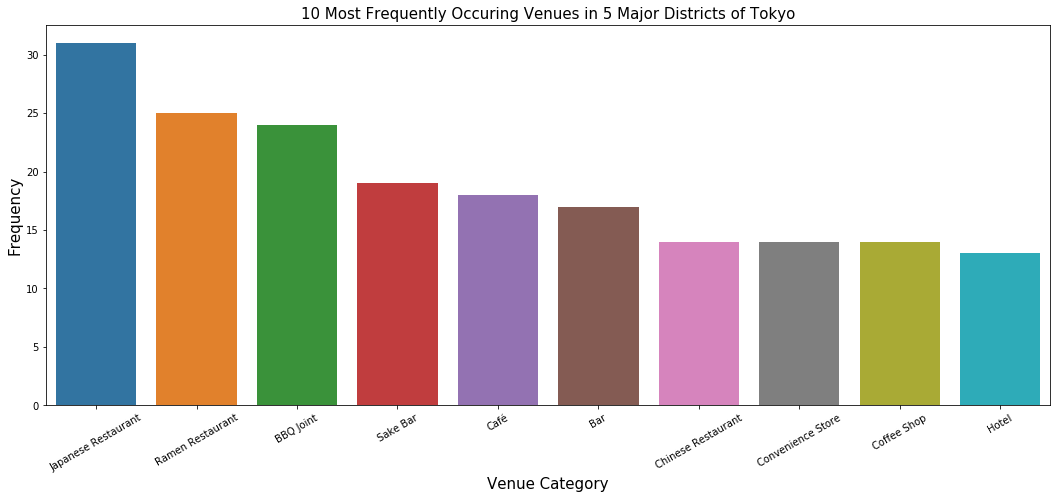

In [30]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Tokyo_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Districts of Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [31]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Tokyo_5_Dist_Venues_onehot = pd.get_dummies(Tokyo_5_Dist_Venues[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
Tokyo_5_Dist_Venues_onehot['District'] = Tokyo_5_Dist_Venues['District'] 
### move district column to the first column
fixed_columns = [Tokyo_5_Dist_Venues_onehot.columns[-1]] + list(Tokyo_5_Dist_Venues_onehot.columns[:-1])
Tokyo_5_Dist_Venues_onehot = Tokyo_5_Dist_Venues_onehot[fixed_columns]
###Tokyo_5_Dist_Venues_onehot.head(3)

In [32]:
Tokyo_5_Dist_Venues_Grouped = Tokyo_5_Dist_Venues_onehot.groupby('District').mean().reset_index()
Tokyo_5_Dist_Venues_Grouped.index = np.arange(1, len(Tokyo_5_Dist_Venues_Grouped)+1)
Tokyo_5_Dist_Venues_Grouped

,District,Accessories Store,African Restaurant,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,...,Trail,Train Station,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Wagashi Place,Wine Bar,Women's Store,Yakitori Restaurant,Yoshoku Restaurant
1,Nagatacho,0.00,0.00,0.02,0.00,0.00,0.00,0.07,0.01,0.02,...,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.02,0.01
2,Nihonbashi,0.00,0.00,0.00,0.01,0.01,0.00,0.06,0.03,0.02,...,0.00,0.00,0.01,0.02,0.00,0.01,0.00,0.00,0.01,0.01
3,Shibuya,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.02,...,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.01,0.00
4,Shinagawa,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.01,0.02,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02
5,Shinjuku,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.09,...,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.01


In [33]:
num_top_venues = 5

for places in Tokyo_5_Dist_Venues_Grouped['District']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = Tokyo_5_Dist_Venues_Grouped[Tokyo_5_Dist_Venues_Grouped['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Nagatacho%%%%%%%%
                 Venue  Freq
0  Japanese Restaurant  0.12
1            BBQ Joint  0.07
2   Chinese Restaurant  0.06
3          Coffee Shop  0.06
4     Ramen Restaurant  0.05


%%%%%%%%%Nihonbashi%%%%%%%%
                 Venue  Freq
0  Japanese Restaurant  0.09
1            BBQ Joint  0.06
2                 Café  0.05
3      Soba Restaurant  0.05
4           Hobby Shop  0.04


%%%%%%%%%Shibuya%%%%%%%%
                Venue  Freq
0                Café  0.10
1         Record Shop  0.07
2         Coffee Shop  0.05
3   French Restaurant  0.04
4  Chinese Restaurant  0.03


%%%%%%%%%Shinagawa%%%%%%%%
               Venue  Freq
0  Convenience Store  0.14
1   Ramen Restaurant  0.08
2           Sake Bar  0.06
3          BBQ Joint  0.05
4      Grocery Store  0.05


%%%%%%%%%Shinjuku%%%%%%%%
                 Venue  Freq
0                  Bar  0.09
1             Sake Bar  0.09
2     Ramen Restaurant  0.07
3  Japanese Restaurant  0.06
4            BBQ Joint  0.05




In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['District'] = Tokyo_5_Dist_Venues_Grouped['District']

for ind in np.arange(Tokyo_5_Dist_Venues_Grouped.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_5_Dist_Venues_Grouped.iloc[ind, :], num_top_venues)

    
District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Nagatacho,Japanese Restaurant,BBQ Joint,Chinese Restaurant,Coffee Shop,Ramen Restaurant,Hotel,Szechuan Restaurant,Dessert Shop,Beer Bar,American Restaurant
2,Nihonbashi,Japanese Restaurant,BBQ Joint,Café,Soba Restaurant,Hobby Shop,Gift Shop,French Restaurant,Department Store,Chinese Restaurant,Hotel
3,Shibuya,Café,Record Shop,Coffee Shop,French Restaurant,Chinese Restaurant,Ramen Restaurant,Wine Bar,Seafood Restaurant,Stationery Store,Concert Hall
4,Shinagawa,Convenience Store,Ramen Restaurant,Sake Bar,BBQ Joint,Grocery Store,Sushi Restaurant,Yakitori Restaurant,Restaurant,Park,Soba Restaurant
5,Shinjuku,Sake Bar,Bar,Ramen Restaurant,Japanese Restaurant,BBQ Joint,Pub,Hotel,Dessert Shop,Record Shop,Chinese Restaurant


<h3 align=left><font size =4>Clustering the Tokyo Districts (Neighborhoods) using K-Means</fornt></h3>

In [ ]:
from sklearn.cluster import KMeans

kclusters = 3

Tokyo_grouped_clustering = Tokyo_5_Dist_Venues_Grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5])

In [ ]:
District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_df_selected_final

#merge the inital Tokyo Dataframe with Sorted Most Visited places for each neighborhood

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_5_Dist_Coordinate_Cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('District'), on='Major_District')

Tokyo_5_Dist_Coordinate_Cluster_merged.head()

<h3 align=left><font size =4>4. Results</fornt></h3>

Nagatacho district in Chiyoda ward and Nihombashi in Chuo ward are dominated by Japanese and Chinese restaurants as the the most common venues.
Shibuya and Shinjuku areas are dominated by bars, pubs, and cafe as most common venues. 
Nagatacho has maximum number of restaurants as the most common venue whereas has Shibuya area has the least. But, Cafe and BBQ joints are found to be among the most visited destinations in this area.  
Since the clustering was based only on the most common venues o each district, Shinjuku, Shibuya fall under the same cluster and, Nagatacho, Nihonbashi fall under another cluster. Shinagawa is separated from both of these clusters as, convenient stores stand out as the most common venue (with a very high frequency).

<h3 align=left><font size =4>5. Discussion</fornt></h3>

According to this analysis, Shinagawa area will provide least competition for an upcoming lunch restaurant as convenience store is the most common venue in this area and the frequency of restaurants as common venue are very low compared to the remaining districts.
Also seen from the web-scrapped data, the average land price in and around Shinagawa is much cheaper compared to the districts close to central Tokyo. So, definitely this region could potentially be a target for starting quality restaurants. 
Some drawbacks of this analysis are-- the clustering is completely based on the most common venues obtained from Foursquare data. Since land price, distance of the venues from closest stations, number of potential customers, benefits and drawbacks of Shinagawa being a port region, could all play a major role and thus, this analysis is definitely far from being conclusory. However, it definitely gives us some very important preliminary information on possibilities of opening restaurants around the major districts of Tokyo.

<h3 align=left><font size =4>6. Conclusion</fornt></h3>

Finally to conclude this project, We have got a small glimpse of how real life data-science projects look like.I have made use of some frequently used python librairies to scrap web-data, use Foursquare API to explore the major districts of Tokyo and saw the results of segmanetation of districts using Folium leaflet map. Potential for this kind of analysis in a real life business problem is dicussed in great detail. Also, some of the drawbacks and chance for improvements to represent even more realistic pictures are mentioned. Finally, since my analysis were mostly concentrated on the possibilities of opening a restaurants targeting the huge pool of office workers, some of the results obtained are surprisingly what I have expecteafter staying 5 years in Tokyo.